In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [40]:
c = pd.read_csv("time_cellranger.csv")
k1 = pd.read_csv("time_kallisto_step1_bus.csv")
k2 = pd.read_csv("time_kallisto_step2_correct_count.csv")
star = pd.read_csv("time_star.csv")
salmon = pd.read_csv("time_salmon.csv")
salmon_nwl = pd.read_csv("time_salmon_nowhitelist.csv")

seq_depth=pd.read_csv("seq_depth_stat.csv")
seq_depth.index = seq_depth["ID"]

In [41]:
seq_depth

,ID,reads
ID,,
EMTAB7320_v2,EMTAB7320_v2,335147976
heart1k_v2,heart1k_v2,88872840
heart1k_v3,heart1k_v3,84512390
hgmm10k_v3,hgmm10k_v3,721180737
hgmm1k_v2,hgmm1k_v2,75225120
hgmm1k_v3,hgmm1k_v3,63105786
neuron10k_v3,neuron10k_v3,357111595
pbmc10k_v3,pbmc10k_v3,638901019
pbmc1k_v3,pbmc1k_v3,66601887


In [42]:
k1.index=k1.ID
k2.index=k2.ID
k = k1 + k2
del k["ID"]

In [43]:
k = k.reset_index()

In [66]:
k["max_rss"] = pd.concat([k1["max_rss"], k2["max_rss"]], axis=1).max(axis=1).values

In [44]:
k.s[0] == k1.s[0] + k2.s[0]

True

In [45]:
c["reads"] = c.ID.map(seq_depth["reads"])
k["reads"] = k.ID.map(seq_depth["reads"])
star["reads"] = star.ID.map(seq_depth["reads"])
salmon["reads"] = salmon.ID.map(seq_depth["reads"])
salmon_nwl["reads"] = salmon_nwl.ID.map(seq_depth["reads"])

In [67]:
k.head()

,ID,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,reads
0,EMTAB7320_v2,1401.6244,0:19:030:04:17,3511.91,7669.59,6904.64,6905.54,42304.66,15686.26,0,335147976
1,heart1k_v2,232.5227,0:02:550:00:56,3480.62,7557.27,6816.86,6817.52,5615.65,2494.61,0,88872840
2,heart1k_v3,427.7986,0:02:510:04:16,11713.81,16771.59,15189.53,15190.23,5657.10,1798.52,0,84512390
3,hgmm10k_v3,2307.7571,0:25:240:13:03,12083.73,20916.68,19407.45,19408.35,48782.55,32313.67,0,721180737
4,hgmm1k_v2,241.3203,0:02:590:01:01,7257.88,11742.31,10943.69,10944.45,9806.10,3056.61,0,75225120


In [5]:
df.head()

,workflow,dataset,s,max_vms,reads
0,kallisto_totals,EMTAB7320_v2,1506,4054,335147976
1,kallisto_totals,heart1k_v2,209,4054,88872840
2,kallisto_totals,heart1k_v3,361,11602,84512390
3,kallisto_totals,hgmm10k_v3,1833,12568,721180737
4,kallisto_totals,hgmm1k_v2,212,7812,75225120


In [47]:
kallisto = k
cellranger = c
salmon_whitelist = salmon
star = star
salmon_nowhitelist = salmon_nwl

# MEMORY

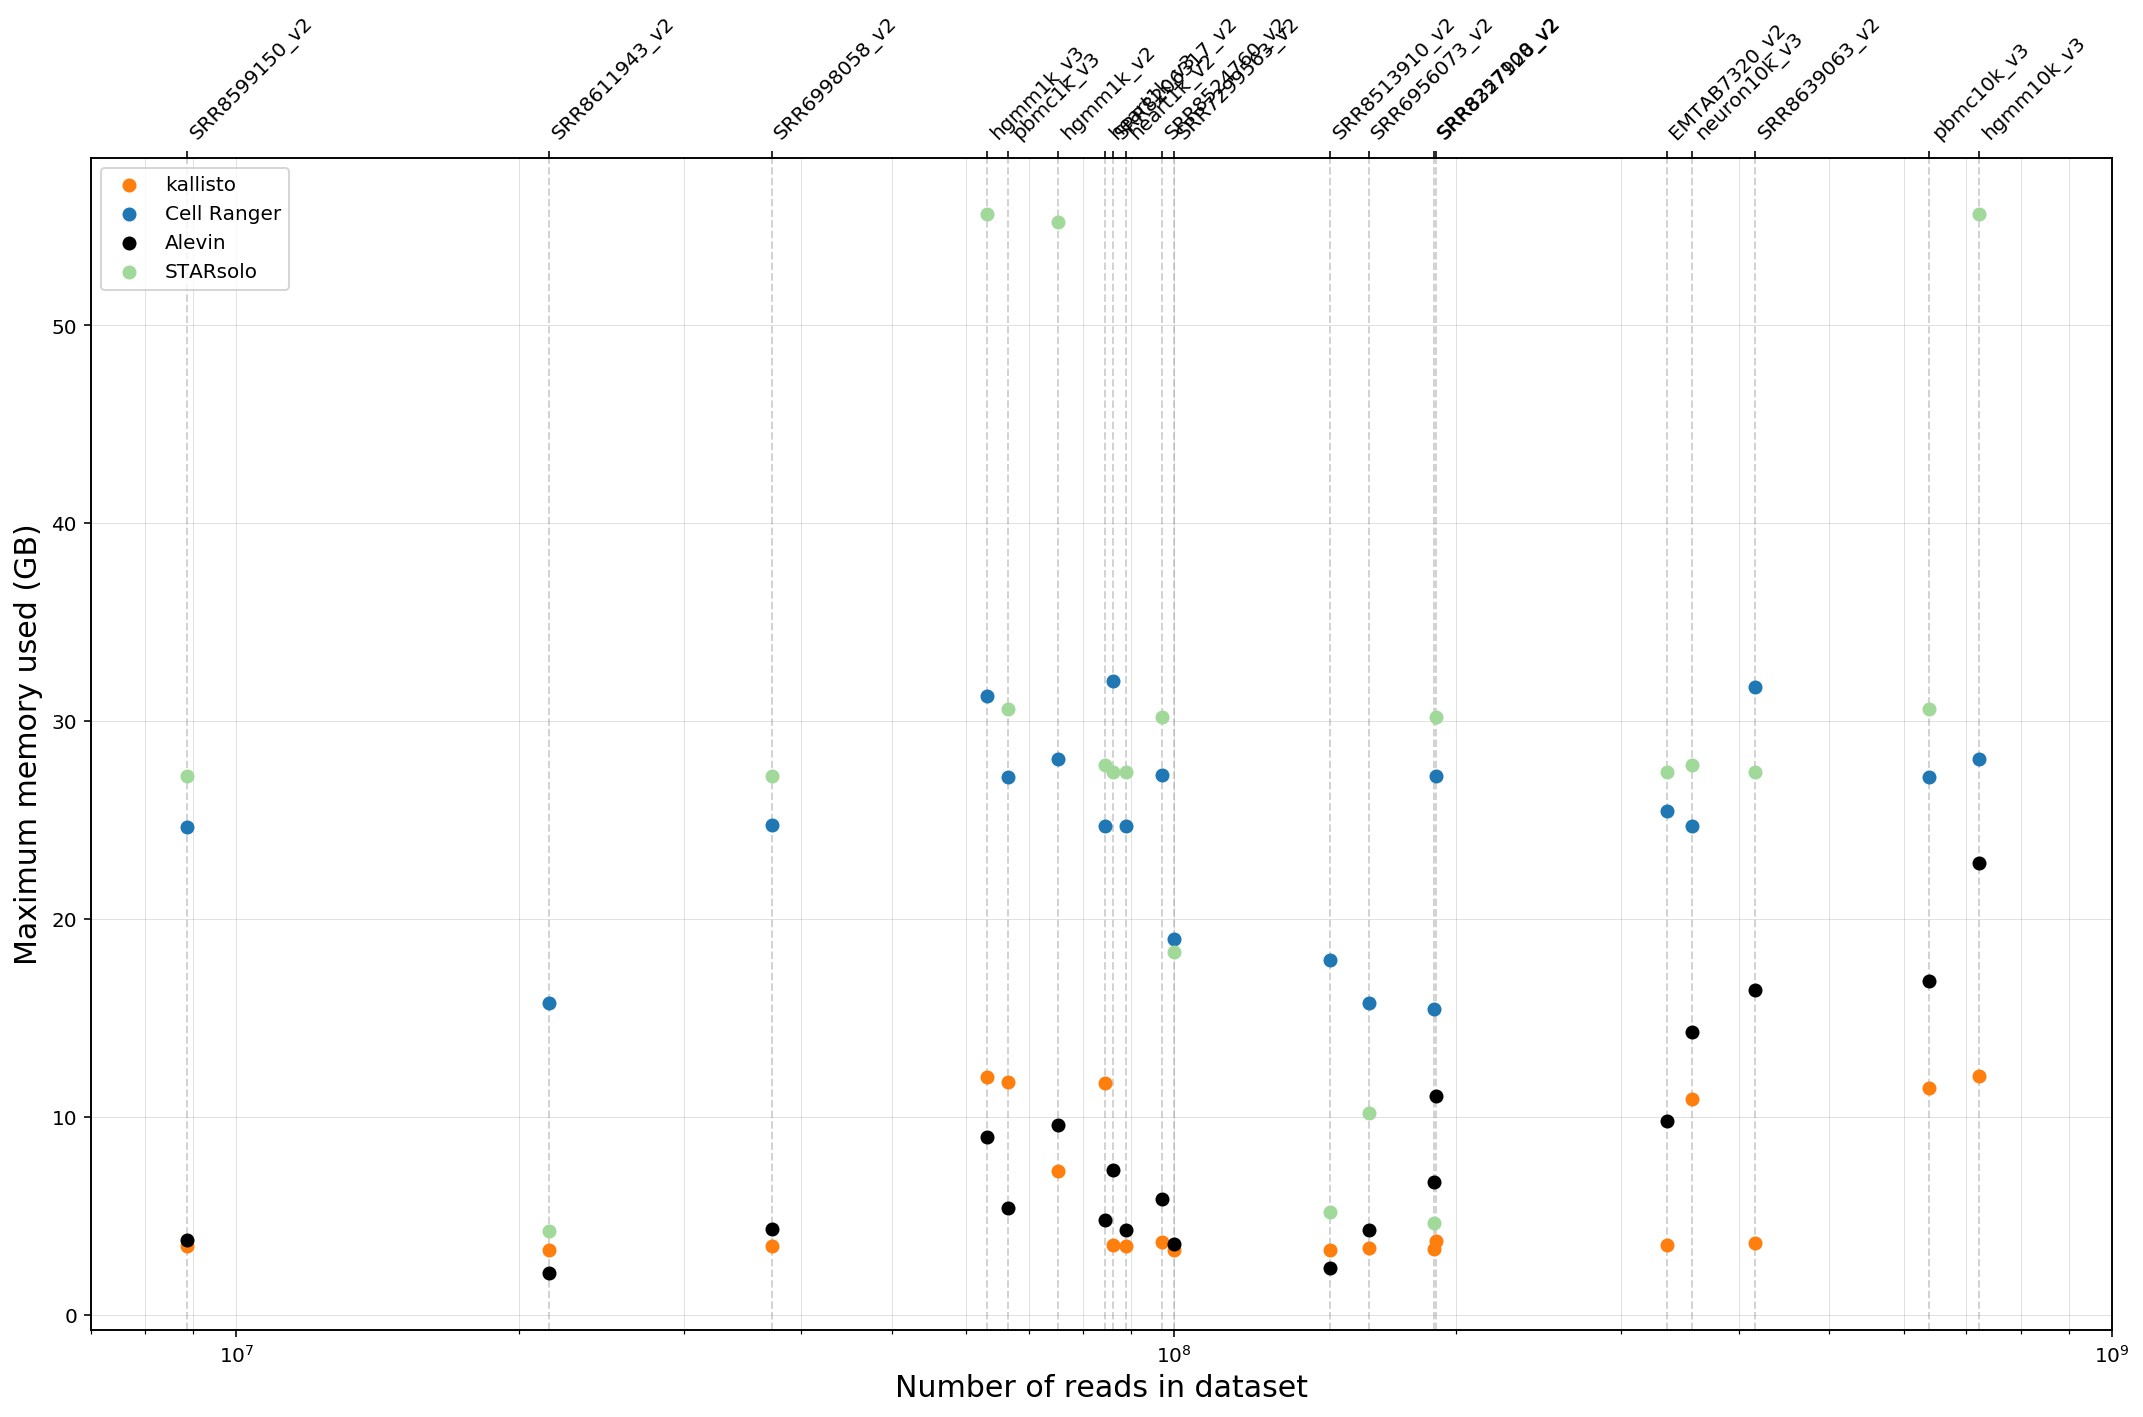

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
fsize= 15
kallisto_color = '#FF7F0E'
tenx_color = '#1F77B4'
star_color = '#a1d99b'
dotsize = 10
xmax = 1e5
gridalpha = 0.2
for nreads in kallisto['reads']:
    ax.axvline(x=nreads,linewidth=1, color='lightgrey', linestyle='--', zorder=1)


mem = "max_rss"


ax.set_xscale('log')
ax.set_xlim(7e6,1e9) 
ax.set_yscale("linear", nonposy='clip')
ax.set_xlabel('Number of reads in dataset',fontsize=fsize)
ax.set_ylabel('Maximum memory used (GB)',fontsize=fsize)
ax.set_title('',loc='center')
# ax.set_title('E', fontweight='bold', fontsize = fsize, loc = 'left' )
ax.grid(color='dimgrey', linestyle='-', linewidth=0.5, which="both", alpha = gridalpha)

ax.scatter( kallisto['reads'], kallisto[mem]/1000, 
           label = 'kallisto', color = kallisto_color, zorder=2)

ax.scatter( cellranger['reads'], cellranger[mem]/1000, 
           label = 'Cell Ranger', color= tenx_color, zorder=2)

# ax.scatter( salmon_whitelist['reads'], salmon_whitelist[mem]/1000, 
#           label = 'Alevin (Salmon)', color= 'black', zorder=2)

ax.scatter( salmon_nowhitelist['reads'], salmon_nowhitelist[mem]/1000, 
            label = 'Alevin', color= 'black', zorder=2)

ax.scatter( star['reads'], star[mem]/1000, 
           label = 'STARsolo', color= star_color, zorder=2)

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xscale('log')

ax2.set_xticks(ticks=kallisto['reads'])
ax2.set_xticklabels( labels=kallisto['ID'])
# ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")

for label in ax2.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment("left")
    
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax.legend()
plt.tight_layout()
plt.savefig('./max_memory_alevin_no_whitelist.pdf', dpi=300)

plt.show()


# RUNTIME

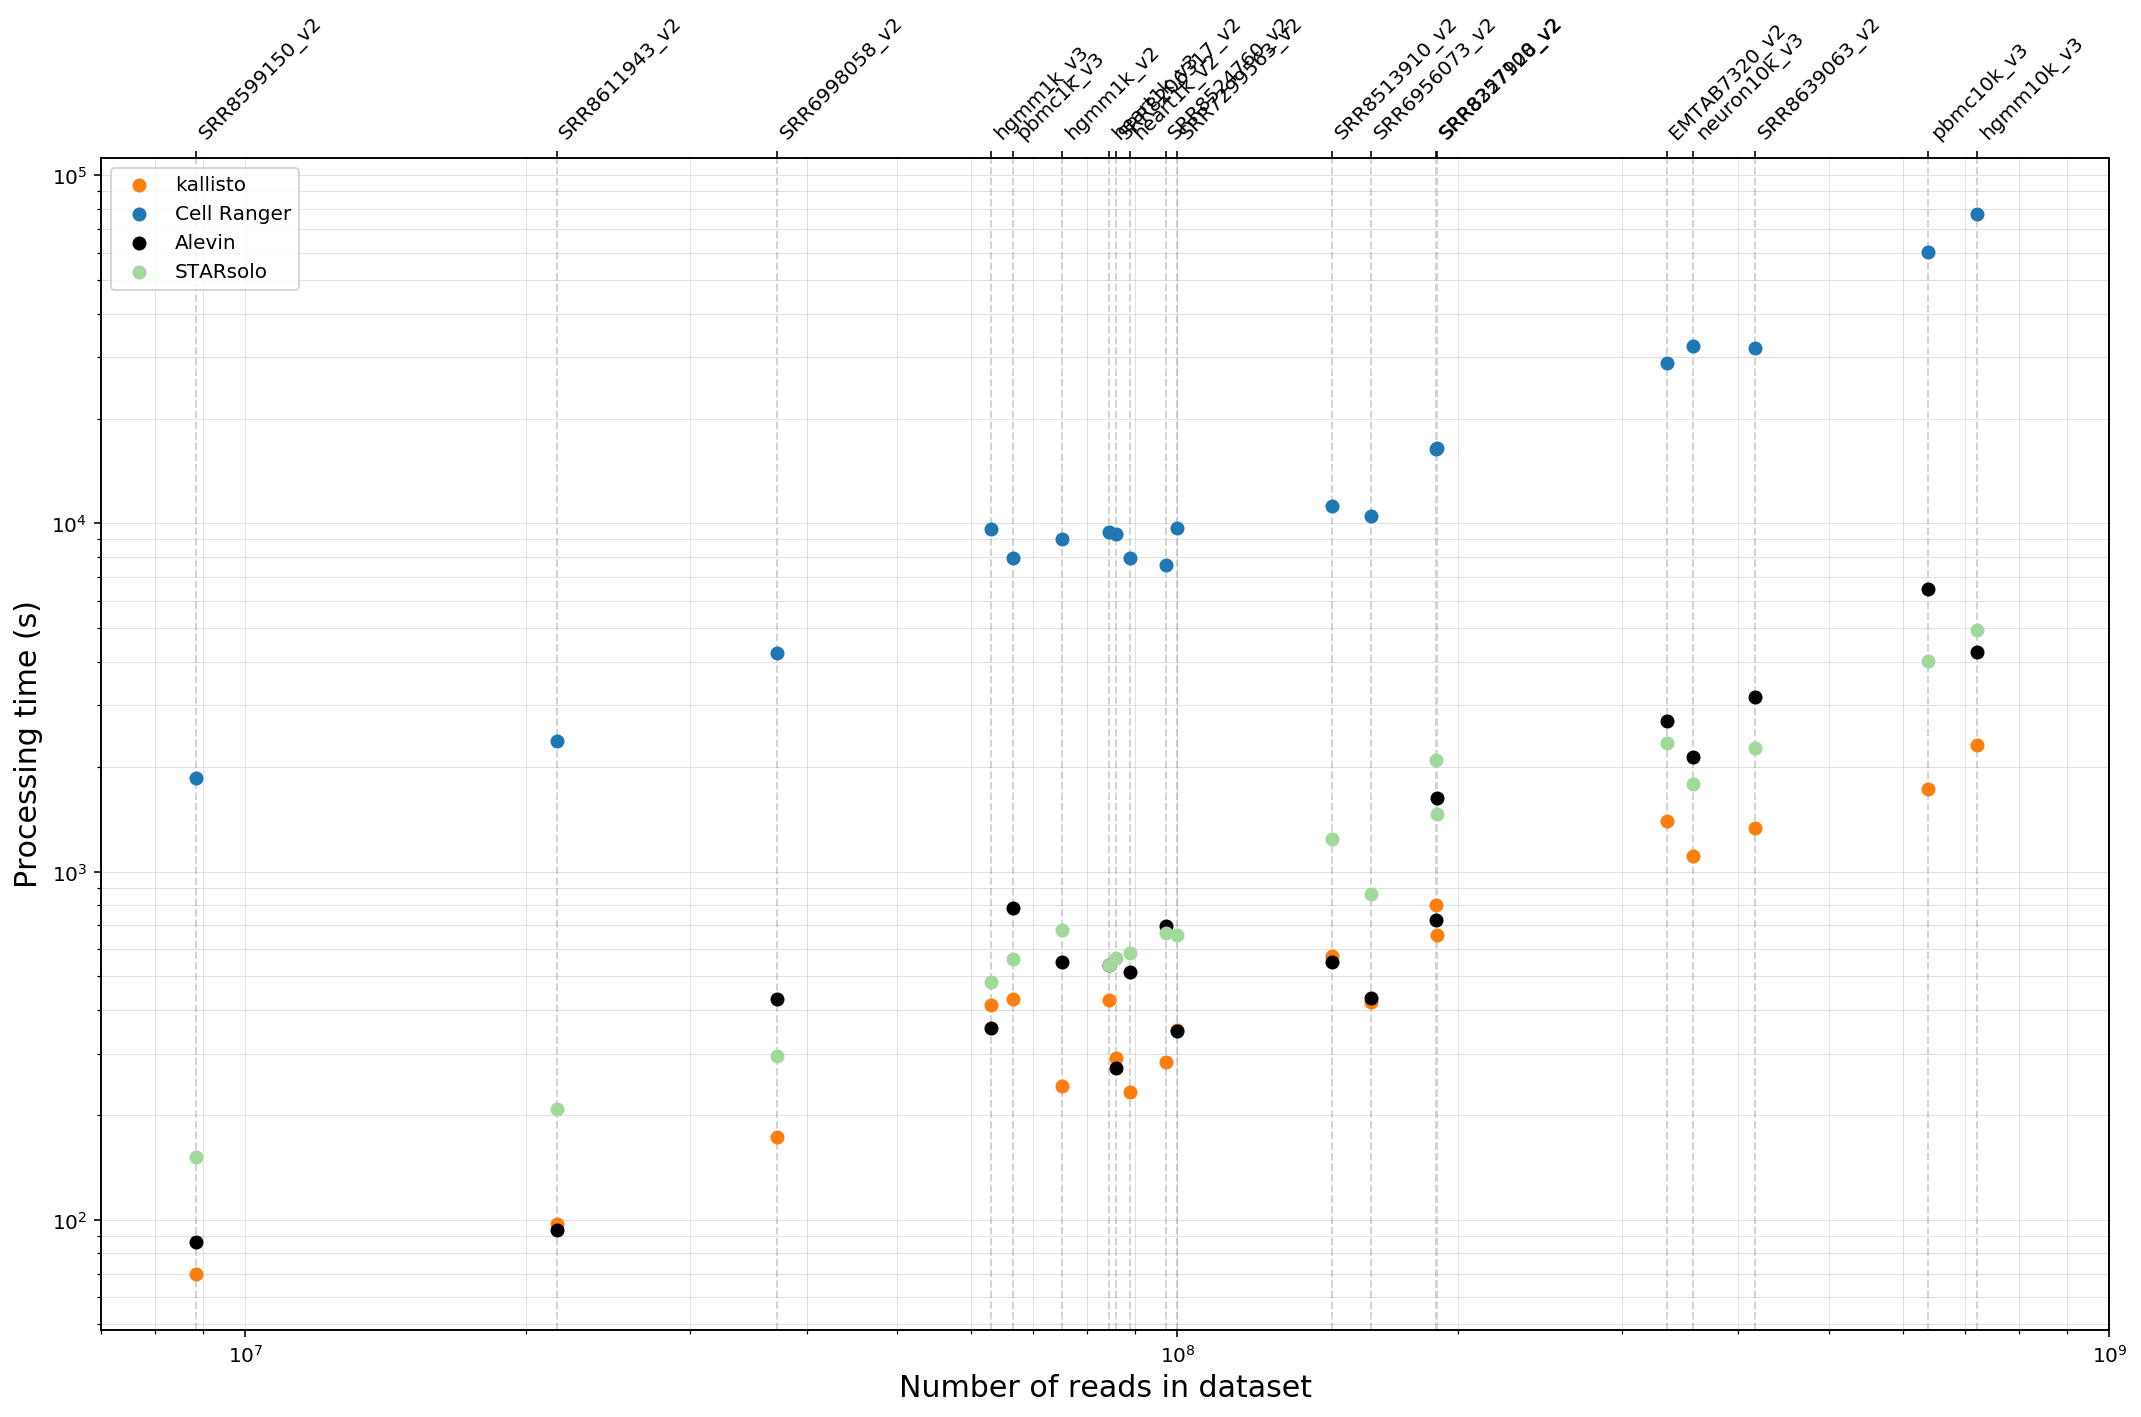

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
fsize= 15
kallisto_color = '#FF7F0E'
tenx_color = '#1F77B4'
star_color = '#a1d99b'

dotsize = 10
xmax = 1e5
gridalpha = 0.2
for nreads in kallisto['reads']:
    ax.axvline(x=nreads,linewidth=1, color='lightgrey', linestyle='--', zorder=1)




ax.set_xscale('log')
ax.set_xlim(7e6,1e9) 
ax.set_yscale("log", nonposy='clip')
ax.set_xlabel('Number of reads in dataset',fontsize=fsize)
ax.set_ylabel('Processing time (s)',fontsize=fsize)
ax.set_title('',loc='center')
# ax.set_title('E', fontweight='bold', fontsize = fsize, loc = 'left' )
ax.grid(color='dimgrey', linestyle='-', linewidth=0.5, which="both", alpha = gridalpha)

ax.scatter( kallisto['reads'], kallisto['s'], 
           label = 'kallisto', color = kallisto_color, zorder=2)

ax.scatter( cellranger['reads'], cellranger['s'], 
           label = 'Cell Ranger', color= tenx_color, zorder=2)

# ax.scatter( salmon_whitelist['reads'], salmon_whitelist['s'], 
#           label = 'Alevin (Salmon)', color= 'black', zorder=2)

ax.scatter( salmon_nowhitelist['reads'], salmon_nowhitelist['s'], 
            label = 'Alevin', color= 'black', zorder=2)

ax.scatter( star['reads'], star['s'], 
           label = 'STARsolo', color= star_color, zorder=2)

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xscale('log')

ax2.set_xticks(ticks=kallisto['reads'])
ax2.set_xticklabels( labels=kallisto['ID'])
# ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")

for label in ax2.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment("left")
    
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax.legend()
plt.tight_layout()
plt.savefig('./runtimes_alevin_no_whitelist.pdf', dpi=300)
plt.show()
